
Python app, by Gleydson Hudson Ferreira da Silva and myself, for the 2020/2021 "Fundamentals of information systems" course at Unipd.

# Description of the FIFA19 project:

The data includes the FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, etc.

# Objectives of the FIFA19 projec:


*   An interactive application that takes **two-player names as input** and produces a **visualization to compare their attributes**. The visualization can be interactive.

*   An application that takes the **name of a team as input** and produces a **visualization comparing the players in terms of an attribute of choice**. The attribute can be an input or can be selected interactively.


*   A visualization (possibly interactive) that **compares the top 20 clubs in terms of the average overall value grouped by player position** (goalkeeper, defensor, etc.).

# Installation of necessary packages for the Project

In [ ]:
pip install dash;

     |████████████████████████████████| 81kB 3.5MB/s 
     |████████████████████████████████| 1.0MB 7.0MB/s 
     |████████████████████████████████| 3.5MB 12.9MB/s 
     |████████████████████████████████| 92kB 6.7MB/s 
ERROR: Operation cancelled by user


In [ ]:
pip install jupyter-dash

In [ ]:
pip install dash-bootstrap-components

     |████████████████████████████████| 194kB 6.5MB/s 


# Necessary Import for the Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter
from math import pi
import os
!pip install --upgrade plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate


# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


     |████████████████████████████████| 13.2MB 317kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **Load the dataframe from the Unipd repository.**


In [ ]:
pd.read_csv("http://www.dei.unipd.it/~silvello/FIS2020/fifa19.csv")

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...



There are some unnecessary columns, therefore let's use the following ones which are more relevant for the comparison and goals of the project.

In [ ]:
chosen_columns = [
    'Name',
    'Age',
    'Photo',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Position',
    'Height',
    'Weight',
    'Jumping',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]

In [ ]:
fifa19 = pd.read_csv("http://www.dei.unipd.it/~silvello/FIS2020/fifa19.csv", usecols = chosen_columns)

# An excerpt:
fifa19.head().T.head(10)

,0,1,2,3,4
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,€110.5M,€77M,€118.5M,€72M,€102M
Wage,€565K,€405K,€290K,€260K,€355K
Special,2202,2228,2143,1471,2281


In [ ]:
print("Number of records (players) in the dataset: {}".format(fifa19.shape[0]))

Number of records (players) in the dataset: 18207


In [ ]:
# Are there null values?

fifa19.isnull().sum()

Name                          0
Age                           0
Photo                         0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot               48
International Reputation     48
Weak Foot                    48
Skill Moves                  48
Work Rate                    48
Body Type                    48
Position                     60
Height                       48
Weight                       48
Crossing                     48
Finishing                    48
HeadingAccuracy              48
ShortPassing                 48
Volleys                      48
Dribbling                    48
Curve                        48
FKAccuracy                   48
LongPassing                  48
BallControl                  48
Acceleration                 48
SprintSpeed                  48
Agility 

# Cleaning, converting and analyzing the dataset

### *48* is repeating many times, let's check if all of them have the same ID or not

In [ ]:
missing_height = fifa19[fifa19['Height'].isnull()].index.tolist()
missing_weight = fifa19[fifa19['Weight'].isnull()].index.tolist()
if missing_height == missing_weight:
    print('They are the same.')
else:
    print('They are different.')

They are the same.


As they are same, I am assuming it will be same for other all columns too.

We will see it soon.

In [ ]:
fifa19.drop(fifa19.index[missing_height], inplace = True)

In [ ]:
# Let's check:

fifa19.isnull().sum()

Name                          0
Age                           0
Photo                         0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                         0
Wage                          0
Special                       0
Preferred Foot                0
International Reputation      0
Weak Foot                     0
Skill Moves                   0
Work Rate                     0
Body Type                     0
Position                     12
Height                        0
Weight                        0
Crossing                      0
Finishing                     0
HeadingAccuracy               0
ShortPassing                  0
Volleys                       0
Dribbling                     0
Curve                         0
FKAccuracy                    0
LongPassing                   0
BallControl                   0
Acceleration                  0
SprintSpeed                   0
Agility 

As we can see, we guessed right and now we have fewer null values.

In [ ]:
# Still, Club has a lot of missing values and Position has a few.
# The 12 missing values for Position correspond to missing values for Club.

fifa19.loc[fifa19['Position'].isnull()]

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,70,70,NaN,€0,€0,1574,Right,1.0,3.0,2.0,Medium/ Medium,Normal,NaN,5'11,172lbs,25.0,36.0,72.0,56.0,19.0,41.0,32.0,51.0,33.0,57.0,47.0,46.0,59.0,66.0,58.0,74.0,58.0,53.0,75.0,47.0,74.0,65.0,26.0,48.0,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,68,68,NaN,€0,€0,1664,Left,1.0,3.0,3.0,High/ Low,Lean,NaN,5'9,154lbs,64.0,73.0,65.0,64.0,52.0,67.0,40.0,36.0,50.0,70.0,71.0,74.0,73.0,61.0,75.0,61.0,63.0,73.0,41.0,61.0,48.0,36.0,67.0,63.0,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,67,67,NaN,€0,€0,1619,Right,1.0,3.0,2.0,Medium/ Medium,Normal,NaN,5'11,190lbs,59.0,39.0,59.0,33.0,37.0,44.0,48.0,40.0,35.0,47.0,64.0,61.0,68.0,68.0,60.0,51.0,72.0,78.0,78.0,47.0,76.0,62.0,49.0,45.0,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,66,69,NaN,€0,€0,1632,Right,1.0,4.0,3.0,High/ Low,Normal,NaN,5'7,143lbs,52.0,70.0,54.0,57.0,63.0,74.0,57.0,41.0,53.0,72.0,71.0,73.0,79.0,63.0,91.0,62.0,75.0,80.0,33.0,59.0,26.0,17.0,70.0,56.0,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,65,66,NaN,€0,€0,1536,Right,1.0,2.0,2.0,Medium/ Medium,Normal,NaN,5'9,154lbs,72.0,48.0,44.0,66.0,31.0,57.0,31.0,29.0,64.0,59.0,68.0,61.0,54.0,65.0,76.0,24.0,58.0,56.0,47.0,29.0,57.0,63.0,38.0,32.0,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0
16450,S. Paul,31,https://cdn.sofifa.org/players/4/19/193911.png,India,57,57,NaN,€0,€0,1032,Right,1.0,3.0,1.0,Medium/ Medium,Normal,NaN,6'1,172lbs,15.0,20.0,15.0,23.0,17.0,14.0,15.0,12.0,22.0,13.0,56.0,46.0,65.0,65.0,46.0,13.0,69.0,32.0,33.0,16.0,28.0,23.0,12.0,27.0,16.0,52.0,12.0,15.0,12.0,53.0,48.0,62.0,57.0,60.0
16539,L. Lalruatthara,23,https://cdn.sofifa.org/players/4/19/245167.png,India,57,63,NaN,€0,€0,1410,Left,1.0,4.0,2.0,High/ Medium,Lean,NaN,5'11,143lbs,51.0,33.0,47.0,28.0,31.0,51.0,32.0,34.0,24.0,44.0,78.0,82.0,70.0,53.0,74.0,24.0,56.0,54.0,47.0,29.0,52.0,58.0,49.0,37.0,38.0,57.0,60.0,61.0,57.0,15.0,12.0,11.0,6.0,12.0
16793,E. Lyngdoh,31,https://cdn.sofifa.org/players/4/19/228192.png,India,56,56,NaN,€0,€0,1613,Right,1.0,3.0,2.0,Medium/ Medium,Lean,NaN,5'9,150lbs,53.0,47.0,39.0,57.0,56.0,57.0,73.0,70.0,51.0,64.0,67.0,66.0,81.0,56.0,84.0,63.0,57.0,70.0,54.0,48.0,33.0,43.0,41.0,53.0,59.0,63.0,43.0,48.0,32.0,7.0,8.0,9.0,15.0,9.0
17129,J. Singh,26,https://cdn.sofifa.org/players/4/19/228198.png,India,55,58,NaN,€0,€0,1466,Right,1.0,4.0,2.0,High/ Medium,Lean,NaN,5'7,159lbs,47.0,51.0,40.0,50.0,45.0,46.0,48.0,59.0,35.0,53.0,86.0,82.0,77.0,51.0,80.0,68.0,53.0,66.0,59.0,52.0,32.0,12.0,49.0,40.0,65.0,42.0,26.0,18.0,13.0,15.0,14.0,8.0,10.0,16.0
17339,S. Passi,23,https://cdn.sofifa.org/players/4/19/233526.png,India,54,63,NaN,€0,€0,1321,Right,1.0,3.0,2.0,Medium/ Low,Normal,NaN,5'9,143lbs,35.0,56.0,49.0,38.0,38.0,53.0,37.0,33.0,33.0,43.0,66.0,68.0,57.0,49.0,58.0,50.0,55.0,59.0,62.0,47.0,39.0,34.0,57.0,43.0,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0


In [ ]:
# So let's drop the rows with missing Club:

missing_club = fifa19[fifa19['Club'].isnull()].index.tolist()
fifa19.drop(missing_club, inplace = True)
fifa19.isnull().sum().unique()

array([0])

### Cleaning some of values so that we can interpret them 

In [ ]:
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

In [ ]:
fifa19['Value'] = fifa19['Value'].apply(value_to_int)
fifa19['Wage'] = fifa19['Wage'].apply(value_to_int)
fifa19.head().T

,0,1,2,3,4
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08
Wage,565000,405000,290000,260000,355000
Special,2202,2228,2143,1471,2281


## Now we will convert Height and Weight into a numeric value for further analysis.

In [ ]:
Height_cm = []
for i in list(fifa19['Height'].values):
    try:
        Height_cm.append((float(str(i)[0])*12.0 + float(str(i)[2:]))*2.54)
    except(ValueError):
        Height_cm.append(np.nan)
fifa19['Height'] = Height_cm

In [ ]:
Weight_kg = fifa19['Weight'].str[:3].astype(float)/2.20462
fifa19['Weight'] = Weight_kg

In [ ]:
fifa19['Height'].head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64

In [ ]:
fifa19['Weight'].head()

0    72.121273
1    83.007502
2    68.038936
3    76.203609
4    69.853308
Name: Weight, dtype: float64

We can look into the mean in the Height and the Weight column.

In [ ]:
fifa19[['Weight', 'Height']].mean()

Weight     75.282297
Height    181.257025
dtype: float64

In [ ]:
# We transform Value and Wage, because they are really large numbers:

fifa19.Value = fifa19.Value / 10e6
fifa19.Value

0        11.050
1         7.700
2        11.850
3         7.200
4        10.200
          ...  
18202     0.006
18203     0.006
18204     0.006
18205     0.006
18206     0.006
Name: Value, Length: 17918, dtype: float64

In [ ]:
fifa19.Wage = fifa19.Wage / 10e3
fifa19.Wage


0        56.5
1        40.5
2        29.0
3        26.0
4        35.5
         ... 
18202     0.1
18203     0.1
18204     0.1
18205     0.1
18206     0.1
Name: Wage, Length: 17918, dtype: float64

In [ ]:
fifa19.Special = fifa19.Special / 100
fifa19

,Name,Age,Photo,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,94,94,FC Barcelona,11.050,56.5,22.02,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,170.18,72.121273,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,94,94,Juventus,7.700,40.5,22.28,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,187.96,83.007502,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,92,93,Paris Saint-Germain,11.850,29.0,21.43,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,175.26,68.038936,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,91,93,Manchester United,7.200,26.0,14.71,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,193.04,76.203609,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,91,92,Manchester City,10.200,35.5,22.81,Right,4.0,5.0,4.0,High/ High,Normal,RCM,180.34,69.853308,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,47,65,Crewe Alexandra,0.006,0.1,13.07,Right,1.0,2.0,2.0,Medium/ Medium,Lean,CM,175.26,60.781450,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,47,63,Trelleborgs FF,0.006,0.1,10.98,Right,1.0,2.0,2.0,Medium/ Medium,Normal,ST,190.50,77.110795,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,47,67,Cambridge United,0.006,0.1,11.89,Right,1.0,3.0,2.0,Medium/ Medium,Normal,ST,172.72,67.131751,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,47,66,Tranmere Rovers,0.006,0.1,12.28,Right,1.0,3.0,2.0,Medium/ Medium,Lean,RW,177.80,69.853308,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


## Change the column Position into 4 categories:



1.   Goalkeeper
2.   Defender
3.   Midfielder
4.   Foward

In [ ]:
# So far, we have the following values for Position:

fifa19['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [ ]:
# Transform:

defence = ["CB", "RB", "LB", "LWB", "RWB", "LCB", "RCB"]
midfielder = ["RW","LW","CM", "CDM","CAM","LM","RM", "LAM", "RAM", "LCM", "RCM", "LDM", "RDM"]
forward = ["LF","CF","RF","LS", "ST", "RS"]

for pos in defence:
  fifa19.loc[fifa19['Position'] == pos, 'Position'] = 'Defender'

for pos in midfielder:
  fifa19.loc[fifa19['Position'] == pos, 'Position'] = "Midfielder"

for pos in ["GK"]:
  fifa19.loc[fifa19['Position'] == pos, 'Position'] = "Goalkeeper"

for pos in forward:
  fifa19.loc[fifa19['Position'] == pos, 'Position'] = "Forward"

## Now the column looks like this:

In [ ]:
fifa19['Position'].head(7)

0       Forward
1       Forward
2    Midfielder
3    Goalkeeper
4    Midfielder
5       Forward
6    Midfielder
Name: Position, dtype: object

## The values are:

In [ ]:
positions = fifa19['Position'].unique().tolist()
positions

['Forward', 'Midfielder', 'Goalkeeper', 'Defender']

In [ ]:
fifa19.drop(fifa19.index[missing_height], inplace = True)

In [ ]:
player_features = [
                  "Overall","Potential","Special",
                  "International Reputation","Weak Foot", "Skill Moves",
                  "Height", "Weight",
                  "Crossing", "Finishing", "HeadingAccuracy",
                  "ShortPassing", "Volleys", "Dribbling",
                  "Curve", "FKAccuracy", "LongPassing",
                  "BallControl", "Acceleration", "SprintSpeed",
                  "Agility", "Reactions", "Balance",
                  "ShotPower", "Jumping", "Stamina",
                  "Strength", "LongShots", "Aggression",
                  "Interceptions", "Positioning", "Vision",
                  "Penalties", "Composure", "Marking",
                  "StandingTackle", "SlidingTackle", "GKDiving",
                  "GKHandling", "GKKicking", "GKPositioning",
                  "GKReflexes", "Position"
]

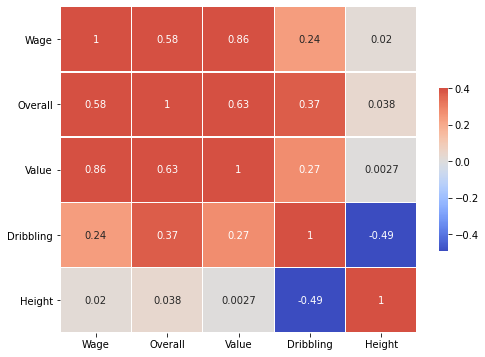

In [ ]:
# We can start exploring the correlation between variables.
# Wage and Value are higly correlated, as can be expected.

cor = fifa19[['Club', 'Wage', 'Overall', 'Value', 'Dribbling', 'Height']].corr()
g = sns.heatmap(cor,  vmax = .4, center = 0,
                linewidths = .3, cbar_kws = {"shrink": .5},
                annot = True, cmap = 'coolwarm')
g.figure.set_size_inches(8,6)
plt.show();

## Let's work on the type of each feature, in order to make better visualizations.

In [ ]:
fifa19.dtypes

Name                         object
Age                           int64
Photo                        object
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Special                     float64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Height                      float64
Weight                      float64
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       float64
FKAccuracy                  float64
LongPassing                 

## 3 types:



1.   Integer
2.   Flot
3.   Object (which includes images and strings)





In [ ]:
types = fifa19.dtypes.unique().tolist()
types

[dtype('O'), dtype('int64'), dtype('float64')]

In [ ]:
# Integers value are ok.

int_part = fifa19.select_dtypes(np.dtype('int64')).head()
int_part

,Age,Overall,Potential
0,31,94,94
1,33,94,94
2,26,92,93
3,27,91,93
4,27,91,92


In [ ]:
# As for float values, we can see that some of them are actually discrete.
# If one likes, these can be also interpreted as categorical values (and used for grouping, for example).

float_part = fifa19.select_dtypes(np.dtype('float64'))
float_part.head()

,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,11.05,56.5,22.02,5.0,4.0,4.0,170.18,72.121273,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,7.70,40.5,22.28,5.0,4.0,5.0,187.96,83.007502,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,11.85,29.0,21.43,5.0,5.0,5.0,175.26,68.038936,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,7.20,26.0,14.71,4.0,3.0,1.0,193.04,76.203609,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,10.20,35.5,22.81,4.0,5.0,4.0,180.34,69.853308,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


## Judging from the count of unique values, we could consider categorical those numerical features with at most, say, 5 values.

In [ ]:
for feat in float_part.columns:
  print(feat, ": ", fifa19[feat].nunique())

Value :  217
Wage :  143
Special :  1421
International Reputation :  5
Weak Foot :  5
Skill Moves :  5
Height :  21
Weight :  57
Crossing :  89
Finishing :  93
HeadingAccuracy :  91
ShortPassing :  85
Volleys :  87
Dribbling :  94
Curve :  89
FKAccuracy :  90
LongPassing :  84
BallControl :  90
Acceleration :  86
SprintSpeed :  85
Agility :  81
Reactions :  68
Balance :  81
ShotPower :  92
Jumping :  74
Stamina :  85
Strength :  74
LongShots :  92
Aggression :  85
Interceptions :  89
Positioning :  94
Vision :  85
Penalties :  87
Composure :  83
Marking :  92
StandingTackle :  90
SlidingTackle :  88
GKDiving :  71
GKHandling :  70
GKKicking :  79
GKPositioning :  79
GKReflexes :  76


In [ ]:
# For now, the categorical features are the following ones.

cat_features = [feat for feat in float_part.columns if fifa19[feat].nunique() <= 5]
fifa19[cat_features].head()

,International Reputation,Weak Foot,Skill Moves
0,5.0,4.0,4.0
1,5.0,4.0,5.0
2,5.0,5.0,5.0
3,4.0,3.0,1.0
4,4.0,5.0,4.0


In [ ]:
# Now the 'object' types:

obj_part = fifa19.select_dtypes(np.dtype('O'))
obj_part.head()

,Name,Photo,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,Forward
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,Juventus,Right,High/ Low,C. Ronaldo,Forward
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,Midfielder
3,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain,Manchester United,Right,Medium/ Medium,Lean,Goalkeeper
4,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,Manchester City,Right,High/ High,Normal,Midfielder


## 'Body type' has 3 possible values: it is a good categorical feature.

In [ ]:
# 
# 7 players don't have an associated body type.

by_bodytype = obj_part.groupby('Body Type')[['Name','Club']].agg({'Name':'count','Club':'last'})
by_bodytype.rename(columns = {'Name': 'count'}, inplace = True)
by_bodytype

,count,Club
Body Type,,
Akinfenwa,1,Wycombe Wanderers
C. Ronaldo,1,Juventus
Courtois,1,Real Madrid
Lean,6329,Tranmere Rovers
Messi,1,FC Barcelona
Neymar,1,Paris Saint-Germain
Normal,10413,Cambridge United
PLAYER_BODY_TYPE_25,1,Liverpool
Shaqiri,1,Liverpool


## Instead of dropping, we make some replacements, following a suggestion by https://www.kaggle.com/shahriyarmammadli/fifa19-analysis-of-players:

In [ ]:
fifa19["Body Type"].replace(["PLAYER_BODY_TYPE_25"], "Normal", inplace = True)
fifa19["Body Type"].replace(["Shaqiri"],"Stocky", inplace = True)
fifa19["Body Type"].replace(["Courtois"], "Normal", inplace = True)
fifa19["Body Type"].replace(["Messi"], "Normal", inplace = True)
fifa19["Body Type"].replace(["Neymar"], "Normal", inplace = True)
fifa19["Body Type"].replace(["C. Ronaldo"], "Normal", inplace = True)
fifa19["Body Type"].replace(["Akinfenwa"], "Stocky", inplace = True)

In [ ]:
by_bodytype = fifa19.groupby('Body Type')[['Name','Club']].agg({'Name':'count','Club':'last'})
by_bodytype.rename(columns = {'Name': 'count'}, inplace = True)
by_bodytype

,count,Club
Body Type,,
Lean,6329,Tranmere Rovers
Normal,10418,Cambridge United
Stocky,1123,Burton Albion


In [ ]:
cat_features.append('Body Type')
cat_features

['International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type']

In [ ]:
# As for the other features:

for feature in obj_part.columns:
  print(feature, ": ", fifa19[feature].nunique())

Name :  16882
Photo :  17870
Nationality :  163
Club :  651
Preferred Foot :  2
Work Rate :  9
Body Type :  3
Position :  4


## Except for Photo, the following features are categorical as well:

In [ ]:
cat_features.extend(['Name', 'Club', 'Nationality', 'Preferred Foot', 'Position', 'Work Rate'])
print("Categorical features:")
cat_features

Categorical features:


['International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Body Type',
 'Name',
 'Club',
 'Nationality',
 'Preferred Foot',
 'Position',
 'Work Rate']

## Numerical Features

In [ ]:
print("Numerical features:")
num_features = int_part.columns.tolist() + float_part.columns.tolist()
print(num_features)

Numerical features:
['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [ ]:
# hybrid_features = list(set(num_features).intersection(set(cat_features)))
# print("Hybrid features:")
# hybrid_features

# First goal of the Project - Development phase

*   An interactive application that takes **two-player names as input** and produces a **visualization to compare their attributes**. The visualization can be interactive.

In [ ]:
df_players = fifa19.copy()
df_players = df_players.set_index('Name').T
df_players.head(7)

Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,R. Lewandowski,T. Kroos,D. Godín,David Silva,N. Kanté,P. Dybala,H. Kane,A. Griezmann,M. ter Stegen,T. Courtois,Sergio Busquets,E. Cavani,M. Neuer,S. Agüero,G. Chiellini,K. Mbappé,M. Salah,Casemiro,J. Rodríguez,L. Insigne,Isco,C. Eriksen,Coutinho,P. Aubameyang,M. Hummels,Marcelo,G. Bale,H. Lloris,G. Higuaín,Thiago Silva,S. Handanovič,G. Buffon,S. Umtiti,M. Icardi,K. Koulibaly,P. Pogba,K. Navas,R. Lukaku,C. Immobile,Jordi Alba,...,K. Taylor,T. Lawal,L. Jagne,D. Szczepaniak,P. Wieliczko,T. Gundelund,Wang Xin,M. Frøkjær-Jensen,H. Norris,N. Ayéva,Wu Lei,J. Manley,T. Pugh,Nicolas Firmino,Y. Uchimura,C. Hawkins,R. Takae,S. Adewusi,E. Clarke,T. Hillman,R. Roache,L. Wahlstedt,J. Williams,M. Hurst,C. Maher,Y. Góez,K. Pilkington,D. Horton,E. Tweed,Zhang Yufeng,C. Ehlich,L. Collins,A. Kaltner,L. Watkins,J. Norville-Williams,S. Squire,N. Fuentes,J. Milli,S. Griffin,K. Fujikawa,D. Holland,J. Livesey,M. Baldisimo,J. Young,D. Walsh,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
Age,31,33,26,27,27,27,32,31,32,25,29,28,32,32,27,24,24,27,26,26,29,31,32,30,33,19,26,26,26,27,26,26,26,29,29,30,28,31,30,33,33,40,24,25,27,25,31,25,28,29,...,17,18,20,18,18,16,20,18,17,16,21,19,17,17,33,18,20,18,19,17,18,18,17,22,17,18,44,18,19,20,19,17,18,18,18,18,18,18,18,19,18,18,18,18,18,19,19,16,17,16
Photo,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/players/4/19/183277.png,https://cdn.sofifa.org/players/4/19/177003.png,https://cdn.sofifa.org/players/4/19/176580.png,https://cdn.sofifa.org/players/4/19/155862.png,https://cdn.sofifa.org/players/4/19/200389.png,https://cdn.sofifa.org/players/4/19/188545.png,https://cdn.sofifa.org/players/4/19/182521.png,https://cdn.sofifa.org/players/4/19/182493.png,https://cdn.sofifa.org/players/4/19/168542.png,https://cdn.sofifa.org/players/4/19/215914.png,https://cdn.sofifa.org/players/4/19/211110.png,https://cdn.sofifa.org/players/4/19/202126.png,https://cdn.sofifa.org/players/4/19/194765.png,https://cdn.sofifa.org/players/4/19/192448.png,https://cdn.sofifa.org/players/4/19/192119.png,https://cdn.sofifa.org/players/4/19/189511.png,https://cdn.sofifa.org/players/4/19/179813.png,https://cdn.sofifa.org/players/4/19/167495.png,https://cdn.sofifa.org/players/4/19/153079.png,https://cdn.sofifa.org/players/4/19/138956.png,https://cdn.sofifa.org/players/4/19/231747.png,https://cdn.sofifa.org/players/4/19/209331.png,https://cdn.sofifa.org/players/4/19/200145.png,https://cdn.sofifa.org/players/4/19/198710.png,https://cdn.sofifa.org/players/4/19/198219.png,https://cdn.sofifa.org/players/4/19/197781.png,https://cdn.sofifa.org/players/4/19/190460.png,https://cdn.sofifa.org/players/4/19/189242.png,https://cdn.sofifa.org/players/4/19/188567.png,https://cdn.sofifa.org/players/4/19/178603.png,https://cdn.sofifa.org/players/4/19/176676.png,https://cdn.sofifa.org/players/4/19/173731.png,https://cdn.sofifa.org/players/4/19/167948.png,https://cdn.sofifa.org/players/4/19/167664.png,https://cdn.sofifa.org/players/4/19/164240.png,https://cdn.sofifa.org/players/4/19/162835.png,https://cdn.sofifa.org/players/4/19/1179.png,https://cdn.sofifa.org/players/4/19/205600.png,https://cdn.sofifa.org/players/4/19/201399.png,https://cdn.sofifa.org/players/4/19/201024.png,https://cdn.sofifa.org/players/4/19/195864.png,https://cdn.sofifa.org/players/4/19/193041.png,https://cdn.sofifa.org/players/4/19/192505.png,https://cdn.sofifa.org/players/4/19/192387.png,https://cdn.sofifa.org/players/4/19/189332.png,...,https://cdn.sofifa.org/players/4/19/246600.png,https://cdn.sofifa.org/players/4/19/244810.png,https://cdn.sofifa.org/players/4/19/244561.png,https://cdn.sofifa.org/players/4/19/244817.png,https://cdn.sofifa.org/players/4/19/

## Filter for the numerical features:

In [ ]:
player_num = df_players.loc[num_features]
player_num.head(7)

Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,R. Lewandowski,T. Kroos,D. Godín,David Silva,N. Kanté,P. Dybala,H. Kane,A. Griezmann,M. ter Stegen,T. Courtois,Sergio Busquets,E. Cavani,M. Neuer,S. Agüero,G. Chiellini,K. Mbappé,M. Salah,Casemiro,J. Rodríguez,L. Insigne,Isco,C. Eriksen,Coutinho,P. Aubameyang,M. Hummels,Marcelo,G. Bale,H. Lloris,G. Higuaín,Thiago Silva,S. Handanovič,G. Buffon,S. Umtiti,M. Icardi,K. Koulibaly,P. Pogba,K. Navas,R. Lukaku,C. Immobile,Jordi Alba,...,K. Taylor,T. Lawal,L. Jagne,D. Szczepaniak,P. Wieliczko,T. Gundelund,Wang Xin,M. Frøkjær-Jensen,H. Norris,N. Ayéva,Wu Lei,J. Manley,T. Pugh,Nicolas Firmino,Y. Uchimura,C. Hawkins,R. Takae,S. Adewusi,E. Clarke,T. Hillman,R. Roache,L. Wahlstedt,J. Williams,M. Hurst,C. Maher,Y. Góez,K. Pilkington,D. Horton,E. Tweed,Zhang Yufeng,C. Ehlich,L. Collins,A. Kaltner,L. Watkins,J. Norville-Williams,S. Squire,N. Fuentes,J. Milli,S. Griffin,K. Fujikawa,D. Holland,J. Livesey,M. Baldisimo,J. Young,D. Walsh,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
Age,31,33,26,27,27,27,32,31,32,25,29,28,32,32,27,24,24,27,26,26,29,31,32,30,33,19,26,26,26,27,26,26,26,29,29,30,28,31,30,33,33,40,24,25,27,25,31,25,28,29,...,17,18,20,18,18,16,20,18,17,16,21,19,17,17,33,18,20,18,19,17,18,18,17,22,17,18,44,18,19,20,19,17,18,18,18,18,18,18,18,19,18,18,18,18,18,19,19,16,17,16
Overall,94,94,92,91,91,91,91,91,91,90,90,90,90,90,89,89,89,89,89,89,89,89,89,89,89,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,87,87,87,87,87,87,87,87,...,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,47,46
Potential,94,94,93,93,92,91,91,91,91,93,90,90,90,90,90,94,91,90,92,90,89,89,89,89,89,95,89,90,89,88,91,91,89,88,88,88,88,88,88,88,88,88,92,90,90,91,87,89,87,87,...,63,69,60,63,58,66,58,63,66,72,58,59,65,70,48,65,63,63,59,57,69,65,64,58,66,65,48,55,59,64,59,62,61,67,65,64,64,65,67,61,61,70,69,62,68,65,63,67,66,66
Value,11.05,7.7,11.85,7.2,10.2,9.3,6.7,8,5.1,6.8,7.7,7.65,4.4,6,6.3,8.9,8.35,7.8,5.8,5.35,5.15,6,3.8,6.45,2.7,8.1,6.95,5.95,6.95,6.2,7.35,7.35,6.95,5.9,4.6,4.3,6,3.6,5.7,2.4,3,0.4,5.7,6.45,5.1,6.4,3.05,6.25,5.2,3.8,...,0.006,0.006,0.005,0.005,0.004,0.005,0.004,0.006,0.005,0.007,0.004,0.004,0.006,0.006,0.002,0.005,0.006,0.006,0.004,0.004,0.007,0.005,0.005,0.004,0.005,0.005,0,0.004,0.005,0.006,0.004,0.006,0.006,0.006,0.005,0.005,0.005,0.005,0.006,0.006,0.006,0.006,0.007,0.006,0.006,0.006,0.006,0.006,0.006,0.006
Wage,56.5,40.5,29,26,35.5,34,42,45.5,38,9.4,20.5,35.5,12.5,28.5,22.5,20.5,20.5,14.5,24,24,31.5,20,13,30,21.5,10,25.5,28.5,31.5,16.5,31.5,20.5,34,26.5,16,28.5,35.5,15,24.5,16.5,11,7.7,20.5,13,11.5,21,19.5,23,11.5,25,...,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
Special,22.02,22.28,21.43,14.71,22.81,21.42,22.8,23.46,22.01,13.31,21.52,21.9,19.46,21.15,21.89,20.92,21.65,22.46,13.28,13.11,20.65,21.61,14.73,21.07,18.41,21.18,21.46,21.7,21.71,20.17,21.37,21.17,21.75,20.69,20.38,22.79,22.79,13.35,19.65,20.77,12.62,13.34,21.47,19.4,16.6,22.47,13.45,20.31,20.09,22.3,...,13.55,8.44,13.29,7.84,13.54,12.44,12.81,13.72,11.16,12.86,13.64,11.52,13.5,13.42,12.62,7.78,13.74,13.7,12.25,12.18,11.78,7.38,11.66,9.87,12.96,13.11,7.74,13.68,13.15,13.89,13.66,12.97,12.9,12.85,12.5,13.25,11.91,7.31,13.25,13.33,13.62,7.92,13.03,12.03,10.98,13.07,10.98,11.89,12.28,13.21
International Reputation,5,5,5,4,4,4,4,5,4,3,4,4,3,4,3,3,3,4,3,4,4,4,5,4,4,3,3,3,4,3,3,3,3,3,4,4,4,4,4,4,3,4,3,3,3,4,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Filter for non numerical features:

In [ ]:
cat_features_without_name = list(set(cat_features).difference({'Name'})) # 'Name' in cat_features
player_cat = df_players.loc[cat_features_without_name + ['Photo']]
player_cat

Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak,R. Lewandowski,T. Kroos,D. Godín,David Silva,N. Kanté,P. Dybala,H. Kane,A. Griezmann,M. ter Stegen,T. Courtois,Sergio Busquets,E. Cavani,M. Neuer,S. Agüero,G. Chiellini,K. Mbappé,M. Salah,Casemiro,J. Rodríguez,L. Insigne,Isco,C. Eriksen,Coutinho,P. Aubameyang,M. Hummels,Marcelo,G. Bale,H. Lloris,G. Higuaín,Thiago Silva,S. Handanovič,G. Buffon,S. Umtiti,M. Icardi,K. Koulibaly,P. Pogba,K. Navas,R. Lukaku,C. Immobile,Jordi Alba,...,K. Taylor,T. Lawal,L. Jagne,D. Szczepaniak,P. Wieliczko,T. Gundelund,Wang Xin,M. Frøkjær-Jensen,H. Norris,N. Ayéva,Wu Lei,J. Manley,T. Pugh,Nicolas Firmino,Y. Uchimura,C. Hawkins,R. Takae,S. Adewusi,E. Clarke,T. Hillman,R. Roache,L. Wahlstedt,J. Williams,M. Hurst,C. Maher,Y. Góez,K. Pilkington,D. Horton,E. Tweed,Zhang Yufeng,C. Ehlich,L. Collins,A. Kaltner,L. Watkins,J. Norville-Williams,S. Squire,N. Fuentes,J. Milli,S. Griffin,K. Fujikawa,D. Holland,J. Livesey,M. Baldisimo,J. Young,D. Walsh,J. Lundstram,N. Christoffersson,B. Worman,D. Walker-Rice,G. Nugent
Weak Foot,4,4,5,3,5,4,4,4,3,3,4,5,3,2,3,3,4,3,4,2,3,4,4,4,3,4,3,3,3,3,3,5,4,4,3,4,3,1,4,3,2,2,3,4,3,4,3,3,4,3,...,3,3,2,2,2,3,3,2,3,3,3,3,2,3,3,3,3,3,2,2,3,2,3,2,2,3,2,3,3,3,3,3,3,3,3,3,2,3,3,3,3,2,3,2,3,2,2,3,3,3
Nationality,Argentina,Portugal,Brazil,Spain,Belgium,Belgium,Croatia,Uruguay,Spain,Slovenia,Poland,Germany,Uruguay,Spain,France,Argentina,England,France,Germany,Belgium,Spain,Uruguay,Germany,Argentina,Italy,France,Egypt,Brazil,Colombia,Italy,Spain,Denmark,Brazil,Gabon,Germany,Brazil,Wales,France,Argentina,Brazil,Slovenia,Italy,France,Argentina,Senegal,France,Costa Rica,Belgium,Italy,Spain,...,England,Austria,England,Poland,Poland,Denmark,China PR,Denmark,England,Sweden,China PR,Republic of Ireland,England,Brazil,Japan,England,Japan,Nigeria,England,Wales,Republic of Ireland,Sweden,England,Scotland,Republic of Ireland,Colombia,England,England,Republic of Ireland,China PR,Germany,Wales,Germany,England,England,England,Chile,Italy,Republic of Ireland,Japan,Republic of Ireland,England,Canada,Scotland,Republic of Ireland,England,Sweden,England,England,England
International Reputation,5,5,5,4,4,4,4,5,4,3,4,4,3,4,3,3,3,4,3,4,4,4,5,4,4,3,3,3,4,3,3,3,3,3,4,4,4,4,4,4,3,4,3,3,3,4,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City,Chelsea,Real Madrid,FC Barcelona,Real Madrid,Atlético Madrid,FC Bayern München,Real Madrid,Atlético Madrid,Manchester City,Chelsea,Juventus,Tottenham Hotspur,Atlético Madrid,FC Barcelona,Real Madrid,FC Barcelona,Paris Saint-Germain,FC Bayern München,Manchester City,Juventus,Paris Saint-Germain,Liverpool,Real Madrid,FC Bayern München,Napoli,Real Madrid,Tottenham Hotspur,FC Barcelona,Arsenal,FC Bayern München,Real Madrid,Real Madrid,Tottenham Hotspur,Milan,Paris Saint-Germain,Inter,Paris Saint-Germain,FC Barcelona,Inter,Napoli,Manchester United,Real Madrid,Manchester United,Lazio,FC Barcelona,...,Shrewsbury,LASK Linz,Morecambe,Morecambe,Wisła Płock,Vejle Boldklub,Guangzhou R&F; FC,Odense Boldklub,Oldham Athletic,Örebro SK,Tianjin Quanjian FC,St. Patrick's Athletic,Scunthorpe United,New England Revolution,Hokkaido Consadole Sapporo,Burton Albion,Gamba Osaka,Carlisle United,Fleetwood Town,Newport County,Blackpool,Dalkurd FF,Northampton Town,St. Johnstone FC,Bray Wanderers,Atlético Nacional,Cambridge United,Lincoln City,Derry City,Beijing Renhe FC,SpVgg Unterhaching,Newport County,SpVgg Unterhaching,Cambridge United,Cambridge United,Cambridge United,Unión Española,Lecce,Waterford FC,Júbilo Iwata,Cork City,Burton Albion,Vancouver Whitecaps FC,Swindon Town,Waterford FC,Crewe Alexandra,Trelleborgs FF,Cambridge United,Tranmere Rovers,Tranmere Rovers
Preferred Foot,Left,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,Left,Right,Left,Right,Left,Right,Left,Right,Ri

In [ ]:
player_num.loc['Height']

Name
L. Messi              170.18
Cristiano Ronaldo     187.96
Neymar Jr             175.26
De Gea                193.04
K. De Bruyne          180.34
                       ...  
J. Lundstram          175.26
N. Christoffersson     190.5
B. Worman             172.72
D. Walker-Rice         177.8
G. Nugent              177.8
Name: Height, Length: 17870, dtype: object

## Bar plot for 1° task

In [ ]:
def barplot_players(name1 : str, name2 : str, which_norm = None):
    if which_norm == "global":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): global normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 0, raw = True)
    if which_norm == "pairwise":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): pairwise normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 1, raw = True)
    if which_norm == None:
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): no normalization.'
        df = player_num[[name1, name2]]

    fig = go.Figure()
    ex = player_num.index
    fig.add_trace(go.Bar(
        x = ex,
        y = df[name1],
        name = name1,
        marker_color = 'blue'
    ))
    fig.add_trace(go.Bar(
        x = ex,
        y = df[name2],
        name = name2,
        marker_color = 'orange'
    ))

    # Here we modify the tickangle of the xaxis, resulting in rotated labels.
    fig.update_layout(title = title, title_x = 0.45, title_y = 0.91, barmode = 'group', xaxis_tickangle = 50, showlegend = True)
    return fig

# barplot_players('Cristiano Ronaldo', 'L. Messi', which_norm = 'Pairwise')

## Scatter plot for 1° task
## FIRST PLOT

In [ ]:
def scatter_players(name1 : str, name2 : str, which_norm : str = None):
    if which_norm == "global":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): global normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 0, raw = True)
    if which_norm == "pairwise":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): pairwise normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 1, raw = True)
    if which_norm == None:
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): no normalization.'
        df = player_num[[name1, name2]]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = df.index, y = df[name1],
        fill=None,
        mode='markers+lines',
        line_color='indigo',
        hovertext = df.index,
        hoverinfo = 'x+y',
        name = name1
        ))
    fig.add_trace(go.Scatter(
        x = df.index,
        y = df[name2],
        fill=None,
        mode='markers+lines', line_color='red',
        hovertext = df.index,
        hoverinfo = 'x+y',
        name = name2
        ))
    fig.update_layout(xaxis = dict(tickangle = 50), title_text = title, title_x = 0.45, title_y = 0.94)
    # fig.show()
    return fig

# scatter_players('L. Messi', 'Cristiano Ronaldo', which_norm = "pairwise")

# MESSAGES:
# None: "Raw data. Disadvantage: different scales and units of measurement for each attribute."
# "global_normalization": "Obtained by dividing each player by its max. Closely resembles raw data, but the range is [0 1]. Equal values can become different."
# "pairwise_normalization": "Obtained by dividing all pairs of attributes by their max. We lose the global distribution and get a direct comparison."

## Area plot for 1° task
## SECOND PLOT

In [ ]:
def area_players(name1 : str, name2 : str, which_norm = None):
    # title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + ')'
    if which_norm == "global":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): global normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 0, raw = True)
    if which_norm == "pairwise":
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): pairwise normalization.'
        df = player_num[[name1, name2]].apply(lambda x: np.divide(x, np.max(x)), axis = 1, raw = True)
    if which_norm == None:
        title = name1 + ' (' + df_players[name1].loc['Club'] + ') vs ' + name2 + ' (' + df_players[name2].loc['Club'] + '): no normalization.'
        df = player_num[[name1, name2]]

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = df.index,
        y = df[name1],
        fill="tozeroy",
        mode='lines',
        line_color='indigo',
        hovertext = player_num.index,
        hoverinfo = 'y',
        name = name1
        ))
    fig.add_trace(go.Scatter(
        x = df.index,
        y = df[name2],
        fill="tozeroy",
        mode='lines', line_color='red',
        hovertext = df.index,
        hoverinfo = 'y',
        name = name2
        ))
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.91)
    fig.update_layout(xaxis = dict(tickangle = 50))
    # fig.show()
    return fig

area_players('L. Messi', 'Cristiano Ronaldo', which_norm = None)

# MESSAGES:
# None: "Raw data. Disadvantage: different scales and units of measurement for each attribute."
# "global_normalization": "Obtained by dividing each player by its max. Closely resembles raw data, but the range is [0 1]. Equal values can become different."
# "pairwise_normalization": "Obtained by dividing all pairs of attributes by their max. We lose the global distribution and get a direct comparison."

# Second goal of the project - Development phase

*   An application that takes the **name of a team as input** and produces a **visualization comparing the players in terms of an attribute of choice**. The attribute can be an input or can be selected interactively.

In [ ]:
# Rename the datafram to your choice
club_name = fifa19.copy()

grouping_attrs = ['Dribbling', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Body Type', 'Nationality', 'Preferred Foot', 'Position', 'Work Rate']

## Bar plot for 2° task - FIRST PLOT

In [ ]:
#-----------
# TYPE: bar
#-----------

# 1 optional attribute (for color)

def cat_bar_team_attr(team_name : str, attribute : str, optional_grouping_attr : str = None):
    title = attribute + " of " + team_name + "'s players: a count."
    df1 = fifa19[['Club', attribute, 'Name']].loc[club_name['Club'] == team_name]
    df2 = df1.groupby(attribute).count()[['Club']]
    df2 = df2.rename(columns = {'Club' : '# players with given ' + attribute})
    names = []
    for nation in df2.index:
        names.append(", ".join(tuple(df1['Name'].loc[df1[attribute] == nation])))
    df2['names'] = names
    
    if optional_grouping_attr:
        title += " (color ~ " + optional_grouping_attr + ")"
    fig = px.bar(df2.reset_index(), y = '# players with given ' + attribute, title = title, color = attribute,
                 hover_name = attribute,  custom_data = ['names'], hover_data = ['names'])
  
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.94,
                      xaxis = dict(tickangle = 50, ticktext = df2.reset_index()[attribute]))
    # fig.show()
    return fig



## PIE plot for 2° task - SECOND PLOT

In [ ]:
def cat_bar_team_attr2(team_name : str, attribute : str):
    title = 'How ' + attribute + " is distributed among " + team_name + "'s players"
    df1 = fifa19[['Club', attribute, 'Name']].loc[club_name['Club'] == team_name]
    df2 = df1.groupby(attribute).count()[['Club']]
    df2 = df2.rename(columns = {'Club' : '# players with given ' + attribute})
    names = []
    for nation in df2.index:
        names.append(", ".join(tuple(df1['Name'].loc[df1[attribute] == nation])))
    df2['names'] = names
    fig = px.pie(df2.reset_index(), names = attribute, values = '# players with given ' + attribute,
                 hover_name = '# players with given ' + attribute, custom_data = ['names'], hover_data = ['names'],
                 labels = attribute  
                 )
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.98)
    return fig


# message: mouse over the bars for the count and the names of the players!

## Bar plot for 2° task - FIRST PLOT

In [ ]:
#-----------
# TYPE: barpolar
#-----------
# here we have an optional_grouping_attr
def barpolar_team_attr(team_name : str, attribute : str, optional_grouping_attr : str = None):
    df = fifa19.loc[club_name['Club'] == team_name]
    title = '"' + attribute + '" attribute among ' + team_name + '\'s players'
    if optional_grouping_attr:
        title += " (color = " + optional_grouping_attr + ")"
    fig = px.bar_polar(df, r = attribute, theta = 'Name',
                      color = optional_grouping_attr, template = "plotly_dark",
                      color_discrete_sequence = px.colors.sequential.Plasma_r, title = title)
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.94, xaxis = dict(tickangle = 50))
    
    return fig

# MAX 1 opt. attribute
# barpolar_team_attr('FC Barcelona', 'Dribbling', optional_grouping_attr = 'International Reputation')

# message = "Mouse over slices (slice = proportion of global '{attribute}' value owned by one player)"

## Pie plot for 2° task - SECOND PLOT

In [ ]:
# #-----------
# # TYPE: bar
# #-----------
# # here we have an optional_grouping_attr

def bar_team_attr(team_name : str, attribute : str, optional_grouping_attr : str = None):
    
    df = fifa19.loc[club_name['Club'] == team_name].sort_values(by = attribute)
    
    title = '"' + attribute.upper() + '" attribute among ' + team_name.upper() + '\'s players'
    
    if optional_grouping_attr:
      title += ' (color ~ ' + optional_grouping_attr + ')'
    
    fig = px.bar(df, x = attribute, y = 'Name', title = title, color = optional_grouping_attr)
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.94, xaxis = dict(tickangle = 50))

    return fig

## Scatter plot for 2° task - THIRD PLOT

In [ ]:
#-----------
# TYPE: scatter
#-----------
# ONE optional_grouping_attrs (for color) is fine I think
# there is also the choice of plotting NAME or NATIONALITY on the x axis (default = Name)

def scatter_team_attr(team_name : str,attribute : str, 
                    showlegend = False,
                      on_x_axis = 'Name'):
    df = fifa19.loc[club_name['Club'] == team_name]
    title = '"' + attribute + '" among ' + team_name + '\'s players'

    fig = px.scatter(df, x = on_x_axis, y = attribute,
                     title = title,

                     hover_name = 'Name')
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.94, xaxis = dict(tickangle = 50))
    fig.update_layout(showlegend = showlegend)
    # fig.show()
    return fig

# EXAMPLE WITH 2 opt attributes AND 'Name' on x axis:

# scatter_team_attr(attribute = 'Overall', team_name = 'FC Barcelona',
                  # showlegend = True)

# Mouse over points for names and values! Optional attributes ~ (color, size, symbol).

# Third goal of the project - Development phase

*   A visualization (possibly interactive) that **compares the top 20 clubs in terms of the average overall value grouped by player position** (goalkeeper, defensor, etc.).

In [ ]:
# First, we find the top 20 clubs in terms of the average OVERALL value.

top20clubs = fifa19[['Overall', 'Club']]
top20clubs = top20clubs.groupby('Club').mean() \
                       .sort_values(['Overall'], ascending = False).head(20)
top20clubs.head()

,Overall
Club,
Juventus,82.280000
Napoli,80.000000
Inter,79.750000
Real Madrid,78.242424
Milan,78.074074


In [ ]:
# We then store their names (the indexes).

top20indexes = top20clubs.index.tolist()
top20indexes

['Juventus',
 'Napoli',
 'Inter',
 'Real Madrid',
 'Milan',
 'FC Barcelona',
 'Paris Saint-Germain',
 'Roma',
 'Manchester United',
 'FC Bayern München',
 'SL Benfica',
 'Chelsea',
 'Manchester City',
 'Tottenham Hotspur',
 'FC Porto',
 'Liverpool',
 'Sporting CP',
 'Bayer 04 Leverkusen',
 'Lazio',
 'Borussia Dortmund']

In [ ]:
# We filter the fifa19 dataset with "top20indexes"
# in order be able to .groupby(["Club", "Position"]).

top20not_yet_grouped = fifa19.set_index('Club').loc[top20indexes] \
                             .reset_index()[['Club', 'Position', 'Overall', 'International Reputation']]
top20not_yet_grouped

,Club,Position,Overall,International Reputation
0,Juventus,Forward,94,5.0
1,Juventus,Forward,89,3.0
2,Juventus,Defender,89,4.0
3,Juventus,Defender,86,3.0
4,Juventus,Midfielder,86,3.0
...,...,...,...,...
588,Borussia Dortmund,Goalkeeper,64,1.0
589,Borussia Dortmund,Midfielder,60,1.0
590,Borussia Dortmund,Midfielder,59,1.0
591,Borussia Dortmund,Midfielder,58,1.0


In [ ]:
# The final query. (Or is it?)

top20grouped = top20not_yet_grouped.groupby(['Club', 'Position']) \
                                   .agg({'Overall' : 'mean', 'International Reputation' : 'mean'})
top20grouped = top20grouped.rename(columns = {'Overall' : 'Average overall', 'International Reputation' : 'Average international reputation'})
top20grouped

Average overall  \
Club                Position                      
Bayer 04 Leverkusen Defender          78.625000   
                    Forward           76.000000   
                    Goalkeeper        71.750000   
                    Midfielder        75.100000   
Borussia Dortmund   Defender          78.250000   
                    Forward           71.500000   
                    Goalkeeper        75.000000   
                    Midfielder        74.944444   
Chelsea             Defender          78.555556   
                    Forward           79.000000   
                    Goalkeeper        71.750000   
                    Midfielder        76.500000   
FC Barcelona        Defender          77.181818   
                    Forward           82.250000   
                    Goalkeeper        73.750000   
                    Midfielder        78.714286   
FC Bayern München   Defender          75.250000   
                    Forward           86.500000   
                    Goalkeeper        72.500000   
                    Midfielder        77.866667   
FC Porto            Defender          76.777778   
                    Forward           75.500000   
                    Goalkeeper        73.666667   
                    Midfielder        78.200000   
Inter               Defender          80.250000   
                    Forward           83.000000   
                    Goalkeeper        73.250000   
                    Midfielder        81.300000   
Juventus            Defender          81.666667   
                    Forward           84.750000   
                    Goalkeeper        80.333333   
                    Midfielder        82.444444   
Lazio               Defender          76.000000   
                    Forward           75.000000   
                    Goalkeeper        72.666667   
                    Midfielder        75.785714   
Liverpool           Defender          78.000000   
                    Forward           75.666667   
                    Goalkeeper        74.333333   
                    Midfielder        76.117647   
Manchester City     Defender          77.000000   
                    Forward           86.000000   
                    Goalkeeper        69.750000   
                    Midfielder        77.142857   
Manchester United   Defender          75.818182   
                    Forward           75.000000   
                    Goalkeeper        81.666667   
                    Midfielder        77.647059   
Milan               Defender          78.000000   
                    Forward           82.500000   
                    Goalkeeper        74.250000   
                    Midfielder        78.666667   
Napoli              Defender          79.333333   
                    Forward           84.000000   
                    Goalkeeper        77.666667   
                    Midfielder        80.454545   
Paris Saint-Germain Defender          74.400000   
                    Forward           83.000000   
                    Goalkeeper        77.000000   
                    Midfielder        78.800000   
Real Madrid         Defender          76.416667   
                    Forward           76.400000   
                    Goalkeeper        79.250000   
                    Midfielder        80.500000   
Roma                Defender          77.000000   
                    Forward           81.000000   
                    Goalkeeper        74.000000   
                    Midfielder        78.090909   
SL Benfica          Defender          76.666667   
                    Forward           78.000000   
                    Goalkeeper        72.333333   
                    Midfielder        78.083333   
Sporting CP         Defender          77.222222   
                    Forward           76.333333   
                    Goalkeeper        74.500000   
                    Midfielder        75.857143   
Tottenham Hotspur   Defender          80.222222   
   

In [ ]:
# It is unordered. What if we want to order the teams according to "top20indexes"?
# top20indexes = ['Juventus', 'Napoli', 'Inter', 'Real Madrid', 'Milan', ...]

new_indexes = [(club, pos) for club in top20indexes for pos in positions]
new_indexes[:12]

[('Juventus', 'Forward'),
 ('Juventus', 'Midfielder'),
 ('Juventus', 'Goalkeeper'),
 ('Juventus', 'Defender'),
 ('Napoli', 'Forward'),
 ('Napoli', 'Midfielder'),
 ('Napoli', 'Goalkeeper'),
 ('Napoli', 'Defender'),
 ('Inter', 'Forward'),
 ('Inter', 'Midfielder'),
 ('Inter', 'Goalkeeper'),
 ('Inter', 'Defender')]

In [ ]:
# Using these multi-indexes, the query is now correctly ordered.

top20grouped = top20grouped.reindex(new_indexes)
top20grouped

Average overall  \
Club                Position                      
Juventus            Forward           84.750000   
                    Midfielder        82.444444   
                    Goalkeeper        80.333333   
                    Defender          81.666667   
Napoli              Forward           84.000000   
                    Midfielder        80.454545   
                    Goalkeeper        77.666667   
                    Defender          79.333333   
Inter               Forward           83.000000   
                    Midfielder        81.300000   
                    Goalkeeper        73.250000   
                    Defender          80.250000   
Real Madrid         Forward           76.400000   
                    Midfielder        80.500000   
                    Goalkeeper        79.250000   
                    Defender          76.416667   
Milan               Forward           82.500000   
                    Midfielder        78.666667   
                    Goalkeeper        74.250000   
                    Defender          78.000000   
FC Barcelona        Forward           82.250000   
                    Midfielder        78.714286   
                    Goalkeeper        73.750000   
                    Defender          77.181818   
Paris Saint-Germain Forward           83.000000   
                    Midfielder        78.800000   
                    Goalkeeper        77.000000   
                    Defender          74.400000   
Roma                Forward           81.000000   
                    Midfielder        78.090909   
                    Goalkeeper        74.000000   
                    Defender          77.000000   
Manchester United   Forward           75.000000   
                    Midfielder        77.647059   
                    Goalkeeper        81.666667   
                    Defender          75.818182   
FC Bayern München   Forward           86.500000   
                    Midfielder        77.866667   
                    Goalkeeper        72.500000   
                    Defender          75.250000   
SL Benfica          Forward           78.000000   
                    Midfielder        78.083333   
                    Goalkeeper        72.333333   
                    Defender          76.666667   
Chelsea             Forward           79.000000   
                    Midfielder        76.500000   
                    Goalkeeper        71.750000   
                    Defender          78.555556   
Manchester City     Forward           86.000000   
                    Midfielder        77.142857   
                    Goalkeeper        69.750000   
                    Defender          77.000000   
Tottenham Hotspur   Forward           72.400000   
                    Midfielder        76.466667   
                    Goalkeeper        75.000000   
                    Defender          80.222222   
FC Porto            Forward           75.500000   
                    Midfielder        78.200000   
                    Goalkeeper        73.666667   
                    Defender          76.777778   
Liverpool           Forward           75.666667   
                    Midfielder        76.117647   
                    Goalkeeper        74.333333   
                    Defender          78.000000   
Sporting CP         Forward           76.333333   
                    Midfielder        75.857143   
                    Goalkeeper        74.500000   
                    Defender          77.222222   
Bayer 04 Leverkusen Forward           76.000000   
                    Midfielder        75.100000   
                    Goalkeeper        71.750000   
                    Defender          78.625000   
Lazio               Forward           75.000000   
                    Midfielder        75.785714   
                    Goalkeeper        72.666667   
                    Defender          76.000000   
Borussia Dortmund   Forward           71.500000   
   

In [ ]:
# Different grouping/ordering of the indexes: 
top20grouped_2 = top20not_yet_grouped.groupby(['Position', 'Club']) \
                                   .agg({'Overall' : 'mean', 'International Reputation' : 'mean'})
new_indexes_2 = [(pos, club) for pos in positions for club in top20indexes]
top20grouped_2 = top20grouped_2.reindex(new_indexes_2)
top20grouped_2 = top20grouped_2.rename(columns = {'Overall' : 'Average overall', 'International Reputation' : 'Average international reputation'})
top20grouped_2

Average overall  \
Position   Club                                   
Forward    Juventus                   84.750000   
           Napoli                     84.000000   
           Inter                      83.000000   
           Real Madrid                76.400000   
           Milan                      82.500000   
           FC Barcelona               82.250000   
           Paris Saint-Germain        83.000000   
           Roma                       81.000000   
           Manchester United          75.000000   
           FC Bayern München          86.500000   
           SL Benfica                 78.000000   
           Chelsea                    79.000000   
           Manchester City            86.000000   
           Tottenham Hotspur          72.400000   
           FC Porto                   75.500000   
           Liverpool                  75.666667   
           Sporting CP                76.333333   
           Bayer 04 Leverkusen        76.000000   
           Lazio                      75.000000   
           Borussia Dortmund          71.500000   
Midfielder Juventus                   82.444444   
           Napoli                     80.454545   
           Inter                      81.300000   
           Real Madrid                80.500000   
           Milan                      78.666667   
           FC Barcelona               78.714286   
           Paris Saint-Germain        78.800000   
           Roma                       78.090909   
           Manchester United          77.647059   
           FC Bayern München          77.866667   
           SL Benfica                 78.083333   
           Chelsea                    76.500000   
           Manchester City            77.142857   
           Tottenham Hotspur          76.466667   
           FC Porto                   78.200000   
           Liverpool                  76.117647   
           Sporting CP                75.857143   
           Bayer 04 Leverkusen        75.100000   
           Lazio                      75.785714   
           Borussia Dortmund          74.944444   
Goalkeeper Juventus                   80.333333   
           Napoli                     77.666667   
           Inter                      73.250000   
           Real Madrid                79.250000   
           Milan                      74.250000   
           FC Barcelona               73.750000   
           Paris Saint-Germain        77.000000   
           Roma                       74.000000   
           Manchester United          81.666667   
           FC Bayern München          72.500000   
           SL Benfica                 72.333333   
           Chelsea                    71.750000   
           Manchester City            69.750000   
           Tottenham Hotspur          75.000000   
           FC Porto                   73.666667   
           Liverpool                  74.333333   
           Sporting CP                74.500000   
           Bayer 04 Leverkusen        71.750000   
           Lazio                      72.666667   
           Borussia Dortmund          75.000000   
Defender   Juventus                   81.666667   
           Napoli                     79.333333   
           Inter                      80.250000   
           Real Madrid                76.416667   
           Milan                      78.000000   
           FC Barcelona               77.181818   
           Paris Saint-Germain        74.400000   
           Roma                       77.000000   
           Manchester United          75.818182   
           FC Bayern München          75.250000   
           SL Benfica                 76.666667   
           Chelsea                    78.555556   
           Manchester City            77.000000   
           Tottenham Hotspur          80.222222   
           FC Porto                   76.777778   
           Liverpool                  78.000000   
           Sporting CP                77.222222   
   

In [ ]:
title_task3 = "'Overall' value by position, by team"

## Parallel line plot for 3° task
## SECOND PLOT

In [ ]:

#-----------
# TYPE: parallel_lines
#-----------

# only 1 optional attribute

def parallel20():
    import re
    top20grouped['Positions'] = pd.Categorical(top20grouped.reset_index()['Position']).codes
    top20grouped['Clubs'] = [a for b in [([top20indexes.index(club)+1] * 4) for club in top20indexes] for a in b]
    title = title_task3
 
    cols = ['Club', 'Clubs', 'Average overall', 'Positions']
  
    fig = px.parallel_coordinates(top20grouped.reset_index()[cols], 
                                 color = "Clubs", dimensions = cols,
                                 color_continuous_scale = px.colors.sequential.Inferno,
                                  labels = {} )
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 1., width = 800)
    
    # let's truncate the club names to fit them in the narrow space on the left:
    def truncate(name : str, within : int) -> str:
        if len(name) <= within:
            return name
        if len(name) > within:
            if re.findall("\w+-\w+", name):
                a = re.findall("\w+-\w+", name)[0].split("-")
                repl = a[0][0] + ".-" + a[1][0] + "."
                return re.sub("\w+-\w+", repl, name)
            if len(name.split(" ")[0]) == within - 2:
                if len(name.split(" ")[1]) < within - 2:
                    return name.split(" ")[0][0] + ". " + name.split(" ")[1]
            else:
                return name[:within - 1] + "."
        else:
           return name[:within]
    
    club_labels = [truncate(x, within = 13) for x in top20indexes]
    
    fig.update_traces(dimensions = [
        {"label" : 'Clubs', 'tickvals' : list(range(1, 21)), 'ticktext' : club_labels},
        {},
        {"label" : 'Positions', 'tickvals' : top20grouped['Positions'].loc[('Juventus', slice(None))], 'ticktext' : positions},
        {}
    ], selector = dict(type = 'parcoords'))
    # fig.show()

    return fig

# parallel20()

# Message: Click and drag along any axis (Club, Positions, Average overall) to filter by one or more Clubs!


## Animated line plot for 3° task
## THIRD PLOT

In [ ]:
# Does the ranking of the Clubs reflect the ranking at the "Positions" level?

def animated_team20():
    title = "Average 'Overall' value: is the Club ranking preserved by Position?"
    fig = px.line(
        top20grouped.reset_index(), y = "Average overall", x = 'Club', hover_data = ['Club'],
        animation_frame = 'Position', animation_group = None, hover_name = 'Club', color = 'Position',
        category_orders = {"Club" : top20indexes}, # forces the order of the teams
        range_y = [top20grouped['Average overall'].min() - 2, top20grouped['Average overall'].max() + 2])
    fig.update_layout(title_text = title, title_x = 0.45, title_y = 0.94, showlegend = False,
                      xaxis = {'title': 'Clubs, ordered by global avg. \'Overall\' (top to bottom)', 'visible': True, 'showticklabels': True},
                      yaxis = {'title': 'Avg. \'Overall\' value for one player position', 'visible': True, 'showticklabels': True})
    fig.update_traces(mode = 'markers+lines')
    
    # Animation speed
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000 

    return fig


# Message: Mouse over points for the Team; the animation frame changes the Position.

## Box plot for 3° task 
## FOURTH PLOT

In [ ]:
#-----------
# TYPE: box
#-----------

def boxplot_1():
    title = "Average 'Overall' value: how spread are the teams' values for each position?"
    fig = px.box(top20grouped.reset_index(), x = "Position", y = "Average overall",
              points = "all", color = "Position",
              hover_data = ['Average international reputation', 'Position', "Average overall"], hover_name = 'Club')
    fig.update_layout(title = {
    'text' : title,
    'x' : 0.45,
    'y' : 0.95
    })

    return fig

# message = Mouse over points for the Club name, over boxes for statistics!

## Box plot for 3° task
## FIFTH PLOT

In [ ]:
#-----------
# TYPE: box2
#-----------

def boxplot_2(show_points = True):
    title = "Average 'Overall' values: how spread are the positions' values for each team?"
    fig = px.box(top20grouped.reset_index(), x = "Club", y = "Average overall",
              points = 'all' if show_points else False, color = "Club",
              hover_data = ['Club', 'Average international reputation'], hover_name = 'Position')
    fig.update_layout(title = {
    'text' : title,
    'x' : 0.45,
    'y' : 0.95
    })
    # fig.show()
    return fig


# message = Mouse over points for the Position, over boxes for statistics!

# Putting all together

In [ ]:
players_name = fifa19.Name.unique()

In [ ]:
clubs = fifa19[['Overall', 'Club']]
clubs = clubs.groupby('Club').mean().sort_values('Club', ascending = True)

clubs = clubs.index.to_list()

In [ ]:
plot_type_task1 = ['Scatter', 'Area', 'Bar']
plot_type_task3 = ['Animate', 'Boxplot 1', 'Boxplot 2', 'Parallel Coordinates']

### Stylesheet

In [ ]:
parentDiv = {
    'display': 'flex',
    'margin-top': '20px'
}
showDropDownStyle = {
    'margin-right': '10px',
    'display': 'block'
}
hideDropDownStyle = {
    'display': 'none'
}
dropdownStyle= {
  'margin-right': '10px'
}
plotDropDownStyle = {
    'margin-top': '10px'
}
labelStyle = {
  'text-align': 'center',
  'font-size': '1.5vw',
}
buttonStyle = {
    'width': '20%',
    'height': '20%',
    'pading': '3vw',
    'font-size': '1.5vw',
    'background-color': 'blue',
    'color': 'white',
    'border': '1px solid white'
}
spanStyle = {
    'color': 'red', 
}
showMessage = {
    'margin-top': '10px',
    'font-size': '1.5vw',
    'text-align': 'center',
    'display': 'block'
}
hideMessage = {
    'display': 'none'
}
showGraphStyle = {
    'display': 'block',
    'height': '80vh',
    'width': '150vh',
    'margin-top': '10px'
    
}
hideGraphStyle = {
    'display': 'none'
}

headerStyle = {
    'text-align': 'center',  
}

show = {
    'display': 'block'
}

hide = {
    'display': 'none'
}

## Running the App

In [ ]:
app = JupyterDash(__name__,external_stylesheets=[dbc.themes.BOOTSTRAP],prevent_initial_callbacks=True)

## First Task

### Callback to update the second dropdown based on the first choice of the user

In [ ]:
@app.callback(
    Output('second_player', 'options'),
    Input('first_player', 'value')
)
def set_options_second_player(first_player):
  
  if first_player:
    
    unwanted = [first_player]
    
    second_players = [e for e in players_name if e not in unwanted]

    return [{'label': v, 'value': v} for v in second_players]

### Callback to update the graph based on the value of the dropdown

In [ ]:
@app.callback(
    Output('graph-1', 'style'),
    Output('graph-1', 'figure'),
    Output('message_task1', 'className'),
    Output('message_task1', 'children'),
    
    Input(component_id='plot-task1', component_property='n_clicks'),
    
    [State("first_player", "value"),
     State('second_player', 'value'),
     State('plot_type_task1', 'value'),
     State('normalization', 'value')
    ]
)
def update_graph_task1(button, first_player, second_player, plot, norm):
  
  fig = go.Figure()
  message = ''

  if not first_player or not second_player:
    message = dbc.Alert('Choose the two players', color='danger')
    return hideGraphStyle, fig, 'd-block', message

  if not plot:
    message = dbc.Alert('Choose a plot', color='danger')
    return hideGraphStyle, fig, 'd-block', message

  if plot == 'Scatter':
    if norm:
      fig = scatter_players(first_player, second_player, norm.lower())
    else:
      fig = scatter_players(first_player, second_player)

  elif plot == 'Area':
    if norm:
      fig = area_players(first_player, second_player, norm.lower())
    else:
      fig = area_players(first_player, second_player)
  
  elif plot == 'Bar':
    if norm:
      fig = barplot_players(first_player, second_player, norm.lower())
    else:
      fig = barplot_players(first_player, second_player)
  
  return showGraphStyle, fig, 'd-none', message

### Layout Task 1

In [ ]:
layout_task1 = dbc.Jumbotron([
  
  dbc.Row([
    dbc.Col([
      html.P('An interactive application that takes two-player names as input and produces a visualization to compare their attributes.'
      , className='text-justify', style={'font-size': '2vw'}
      ),
    ], width=12)
  ], className='mb-3'),

  dbc.Container([
      
      html.Div([

        html.Div([
                  
            dbc.Row([       
              html.Div(id='message_task1', style={'margin-top': '15px'}, className='d-none'),
            ], justify='center'),
        
                
            dbc.Row([
                dbc.Col(
                  # Dropdown for the First Player
                  html.Div([
                      html.Label("First Player's name", style=labelStyle),
                      dcc.Dropdown(
                          id='first_player',
                          options=[{'label' : p, 'value' : p} for p in players_name],
                          searchable=True,
                          value=''
                      ),
                    ], 
                    style=dropdownStyle
                  ),width=6
                ),

                dbc.Col(
                      
                  # Dropdown for the Second Player
                  html.Div([
                      html.Label("Second Player's name", style=labelStyle),
                      dcc.Dropdown(
                          id='second_player',
                          searchable=True,
                          value=''
                      ),
                    ], 
                    style=dropdownStyle
                  ), width=6
                )
            ],
            justify='center', no_gutters = True, className='text-center'
          ),

          dbc.Row([
            dbc.Col(
              # Dropdown for the plot
              html.Div([
                  html.Label("Choose a plot", style=labelStyle),
                  dcc.Dropdown(
                      id='plot_type_task1',
                      options=[{'label' : p, 'value' : p} for p in plot_type_task1],
                      value=''
                  ),
                ], style=plotDropDownStyle), width=4),

            dbc.Col(
              # Dropdown for the plot
              html.Div([
                  html.Label("Choose a Norm.", style=labelStyle),
                  dcc.Dropdown(
                      id='normalization',
                      options=[{'label' : p, 'value' : p} for p in ['Pairwise', 'Global']],
                      value=''
                  ),
                ], style=plotDropDownStyle), width=4)
          ], justify='center', className='text-center'),

          dbc.Row([
            dbc.Col(
              # Button to plot
              html.Div([
                dbc.Button('Plot',id='plot-task1', className='btn-lg mb-3', color='primary')
              ],
              style={'text-align': 'center', 'margin-top': '20px'}), width=3)
          ], justify='center'),

          dbc.Row([
            dbc.Col(
              # Button to plot
              html.Div('''Global normalization: obtained by dividing each player by its max. value. It closely resembles actual data, but its range is [0 1].
                            Disadvantages: different scales and units of measurement for each attribute; equal values can become different.''' ,
                       className='mb-3'), width=6)
          ], justify='center'),

          dbc.Row([
            dbc.Col(
              # Button to plot
              html.Div('''Pairwise normalization: obtained by dividing all pairs of attributes (for the two given players) by the maximum of the two.
                          We lose the global distribution, but have a direct comparison.''' ,
                       className='mb-3'), width=6)
          ], justify='center'),

        ]),

    ])
  ]),

  dbc.Row([
    dbc.Col(        
      # Grapth to show the plot
      dcc.Graph(id='graph-1', style=hideGraphStyle)
    ,width=12
    )
  ]),


], fluid = True)

## Second Task

### Callback to update the Attributes values of the dropdown

In [ ]:
@app.callback(
    Output('attributes', 'options'),
    [Input('clubs','value')]
)
def set_numerical_attribute_options(club):
  
  unwanted = ['Name', 'Club']
  
  feat = [e for e in player_features if e not in unwanted]

  feat = sorted(feat)
  
  if not club:
    return dash.no_update

  return [{'label': v, 'value': v} for v in feat]

### Callback to update the dropdown options for the **PLOT TYPES**

In [ ]:
@app.callback(
    Output('plot_type_task2','options'),
    Output('plot_type_task2_div', 'style'),
    [Input('attributes','value')]
)
def update_dropdown_plot(attr):

  opt_num = [{'label': v, 'value': v} for v in ['Bar Polar', 'Bar', 'Scatter']]
  opt_cat = [{'label': v, 'value': v} for v in ['Bar', 'Pie Char']]

# 'Barpolar', 'Pie Num', 'Scatter', 'Line Polar', 'Scatter Polar'
# barpolar_team_attr, pie_team_attr, scatter_team_attr (3), radar_team_attr, scatterpolar_team_attr (3)

# 'Barplot', 'Pie Cat'
# cat_bar_team_attr, cat_bar_team_attr2
  
  if attr in cat_features:
    return opt_cat, show
  elif attr in num_features:
    return opt_num, show
  else:
    return [{'label': '', 'value': ''}], hide

### Callback to update the graph based on the value of the dropdown

In [ ]:
@app.callback(
    Output('graph', 'style'),
    Output('graph', 'figure'),
    Output('message_task2', 'className'),
    Output('message_task2', 'children'),

    
    Input(component_id='plot-task2', component_property='n_clicks'),
    
    [State("clubs", "value"),
     State('attributes', 'value'),
     State('plot_type_task2', 'value'),
    ]
)
# , plot_type_task2
def update_graph_task2(button, team_name, attribute, plot):

  unwanted = ['International Reputation', 'Weak Foot', 'Skill Moves']
  
  numerical = [e for e in num_features if e not in unwanted]

  fig = go.Figure()
  message = ''
  clasName = 'd-none'

  if not team_name:
    message = dbc.Alert('Choose a Team first!', color='danger')
    return hideGraphStyle, fig, 'd-block', message
  
  if not attribute:
    message = dbc.Alert('Choose a attribute', color='danger')
    return hideGraphStyle, fig, 'd-block', message
  
  if not plot:
    message = dbc.Alert('Choose a plot', color='danger')
    return hideGraphStyle, fig, 'd-block', message

  if team_name:

    if attribute in cat_features:

      if plot == 'Bar':
        fig = cat_bar_team_attr(team_name, attribute)
      elif plot == 'Pie Char':
        fig = cat_bar_team_attr2(team_name, attribute)
    
    else:
      if plot == 'Bar Polar':
        fig = barpolar_team_attr(team_name, attribute)
      elif plot == 'Bar':
        fig = bar_team_attr(team_name, attribute)
      elif plot == 'Scatter':
        fig = scatter_team_attr(team_name, attribute)

    return showGraphStyle, fig, clasName, message

    
# 'Barpolar', 'Pie Num', 'Scatter', 'Line Polar', 'Scatter Polar'
# barpolar_team_attr, pie_team_attr, scatter_team_attr (3), radar_team_attr, scatterpolar_team_attr (3)

# 'Barplot', 'Pie Cat'
# cat_bar_team_attr, cat_bar_team_attr2
  


### Layout Task 2

In [ ]:
layout_task2 = dbc.Jumbotron([
  dbc.Row([
    dbc.Col([
      html.P('An application that takes the name of a team as input and produces a visualization comparing the players in terms of an attribute of choice.'
      , className='text-justify', style={'font-size': '2vw'}
      ),
    ], width=12)
  ], className='mb-3'),

  dbc.Container([
  
    html.Div([
      
      html.Div([
                
          dbc.Row([       
            html.Div(children=[], id='message_task2', className='mb-2 mt-2'),
          ], justify='center'),
                
          dbc.Row([
            dbc.Col(
              html.Div([
                  html.Label("Team's Name", style=labelStyle),
                  dcc.Dropdown(
                      id='clubs',
                      options=[{'label' : p, 'value' : p} for p in clubs],
                      searchable=True,
                      value=''
                  ),
              ]),
            width=8)
          ], justify='center', className='text-center mb-4'),

          dbc.Row([       
            html.Div(id='message_info_task2', className='mb-2 mt-2'),
          ], justify='center'),

          dbc.Row([
            dbc.Col(
              html.Div([
                  html.Label('Attributes', style=labelStyle),
                  dcc.Dropdown(
                      id='attributes',
                      searchable=True,
                  ),
                ], 
                style=dropdownStyle
              ),
              width=4
            ),

            dbc.Col([
              # Dropdown for the plot
              html.Div([
                  html.Label("Choose a plot", style=labelStyle),
                  dcc.Dropdown(
                      id='plot_type_task2',
                      value=''
                  ),
                ], id='plot_type_task2_div' , style=hide)], width=4)

          ], justify='center', className='text-center'),

          html.Div([
            dbc.Button('Plot',id='plot-task2', className='btn-lg', color='primary')          
          ],
          style={'text-align': 'center', 'margin-top': '20px'}, className='mb-3'
          )
      ])
    ]),
  ]),

  dbc.Row([
    dbc.Col(
      dcc.Graph(id='graph', style=hideGraphStyle) 
    ,width=12
    )
  ]),



], fluid = True, className='pt-2 pb-2')

## Third Task

### Callback to update the Graph

In [ ]:
@app.callback(
    Output('graph-3', 'style'),
    Output('graph-3', 'figure'),
    Output('message_task3', 'children'),
    
    Input(component_id='plot-task3', component_property='n_clicks'),
    
    [State('plot_type_task3', 'value'),]
)
def update_graph_task3(button, plot):
  
  if plot == 'Animate':
    fig = animated_team20()
    message = dbc.Alert("Mouse over points for the Team; the animation frame changes the Position.", color="info")
  elif plot == 'Boxplot 1':
    fig = boxplot_1()
    message = dbc.Alert("Mouse over points for the Club name, over boxes for statistics!", color="info")
  elif plot == 'Boxplot 2':
    fig = boxplot_2()
    message = dbc.Alert("Mouse over points for the Position, over boxes for statistics!", color="info")
  elif plot == 'Parallel Coordinates':
    fig = parallel20()
    message = dbc.Alert('Click and drag along any axis (Club, Positions, Average overall) to filter by one or more features!', color='info')
  
  return showGraphStyle, fig, message

### Layout Task 3

In [ ]:
layout_task3 = dbc.Jumbotron([
  dbc.Row([
    dbc.Col([
      html.P('A visualization (possibly interactive) that compares the top 20 clubs in terms of the average overall value grouped by player position.'
      , className='text-justify', style={'font-size': '2vw'}
      ),
    ], width=12)
  ], className='mb-3'),

  dbc.Container([
      html.Div([
      
        html.Div([
          dbc.Row([
            dbc.Col(
              # Dropdown for the plot
              html.Div([
                  html.Label("Choose a plot", style=labelStyle),
                  dcc.Dropdown(
                      id='plot_type_task3',
                      options=[{'label' : p, 'value' : p} for p in plot_type_task3],
                      value=''
                  ),
                ], style=dropdownStyle), width=4 )
          ], justify='center', className='mb-2 text-center'),

          dbc.Row([
            
              # Button to plot
              html.Div([
                dbc.Button('Plot',id='plot-task3', className='btn-lg', color='primary')          
              ],
              style={'text-align': 'center', 'margin-top': '20px'}
              )
          ], justify='center'),
          
          dbc.Row([       
            html.Div(id='message_task3', style={'margin-top': '15px'}),
          ], justify='center'),
        
        ]),
    ])
  ], fluid=True),
  
  dbc.Row([
      dbc.Col(      
      # Grapth to show the plot
      dcc.Graph(id='graph-3', style=hideGraphStyle))
  ])

], fluid = True)

## NavBar

In [ ]:
UNI_LOGO = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTRpKhEBP4_0NZ6csX1hkiXO5VDjRhnpvtfYg&usqp=CAU'
navbar = dbc.Navbar(
    [
        html.A(
            # Use row and col to control vertical alignment of logo / brand
            dbc.Row(
                [
                    dbc.Col(html.Img(src=UNI_LOGO, width='300px', height="80px")),
                    dbc.Col(dbc.NavbarBrand("FIS 20 / 21 - FIFA 19", className="text-center mt-2 mb-3")),
                ],
                align="center",
                # no_gutters=True,
            ),
            href="https://www.unipd.it/en/",
        ),
    ],
    color="dark",
    dark=True,
    className='text-center mt-1 mb-3',
)


## App

In [ ]:
tabs = dbc.Tabs(
  [
      dbc.Tab(layout_task1, label="Task 1"),
      dbc.Tab(layout_task2, label="Task 2"),
      dbc.Tab(layout_task3, label="Task 3"),
  ], className='mb-1'
)

In [ ]:
layout = dbc.Container([
    navbar,
    dbc.Container(
        tabs
    ),

],fluid= True, style={'background-color': '#E9ECEF', 'min-height': '100%', 'height': '100%'})


In [ ]:
app.layout = layout

In [ ]:
# Run app and display result inline in the notebook
# If you want to run the notebook in a 'inline' mode is also possible
app.run_server(mode='external')

Dash app running on:


<IPython.core.display.Javascript object>